### RANDOM FOREST REGRESSOR  Y KERAS CON DATOS ADICIONALES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [79]:
#DATA LOADING:
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/train.csv")
df2=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/structures.csv")
df3=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/dipole_moments.csv")
df4=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/magnetic_shielding_tensors.csv")
df5=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/potential_energy.csv")
df6=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/scalar_coupling_contributions.csv")

#### UNION DE LOS DATAFRAMES PRINCIPALES DF Y DF2

In [80]:
#Merge 1
df1= df.rename(columns={"atom_index_0":"atom_index"})
df3= pd.merge(left=df1, right=df2, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_0"})
df3=df3.rename(columns={"x":"x_0","y":"y_0","z":"z_0","atom":"atom_0"})

df3=df3.rename(columns={"atom_index_1":"atom_index"})
df3= pd.merge(left=df3, right=df2, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_1"})
df3=df3.rename(columns={"x":"x_1","y":"y_1","z":"z_1","atom":"atom_1"})

#### CALCULO DE DISTANCIAS PARA CADA PAR

In [81]:
#Distancias
def distance(v1, v2):
       return np.sqrt(np.sum((v1 - v2) ** 2))

def manhattan(v1,v2):
    return sum(abs(v1-v2))

def chevisev(v1,v2):
    return(max(abs(v1-v2)))

In [82]:
distancia=[]
for i in range(len(df3)):
    A=np.array([df3["x_0"][i],df3["y_0"][i],df3["z_0"][i]])
    B=np.array([df3["x_1"][i],df3["y_1"][i],df3["z_1"][i]])
    dist=distance(A,B)
    distancia.append(dist)
df3["Distancia Euclidiana"]=distancia

distancia_manhattan=[]
for i in range(len(df3)):
    A=np.array([df3["x_0"][i],df3["y_0"][i],df3["z_0"][i]])
    B=np.array([df3["x_1"][i],df3["y_1"][i],df3["z_1"][i]])
    dist=manhattan(A,B)
    distancia_manhattan.append(dist)
df3["Distancia Manhattan"]=distancia_manhattan

distancia_chevisev=[]
for i in range(len(df3)):
    A=np.array([df3["x_0"][i],df3["y_0"][i],df3["z_0"][i]])
    B=np.array([df3["x_1"][i],df3["y_1"][i],df3["z_1"][i]])
    dist=chevisev(A,B)
    distancia_chevisev.append(dist)
df3["Distancia Chevisev"]=distancia_chevisev

#### UNION DE DATAFRAME OBTENIDO CON LOS TENSORES DE BLINDAJE MAGNETICO MOLECULAR

En este paso se une el dataframe obtenido con los tensores de blindaje magnetico asociados a cada atomo que conforma el par y posteriormente se calculo el producto punto entre las dos matrices de tensores de los atomos que conforman la union de estudio.

In [85]:
#Merge 2
df3= df3.rename(columns={"atom_index_0":"atom_index"})
df3= pd.merge(left=df3, right=df4, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_0"})
df3=df3.rename(columns={"XX":"XX_0","YX":"YX_0","ZX":"ZX_0","XY":"XY_0","YY":"YY_0","ZY":"ZY_0","XZ":"XZ_0","YZ":"YZ_0","ZZ":"ZZ_0"})

df3=df3.rename(columns={"atom_index_1":"atom_index"})
df3= pd.merge(left=df3, right=df4, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_1"})
df3=df3.rename(columns={"XX":"XX_1","YX":"YX_1","ZX":"ZX_1","XY":"XY_1","YY":"YY_1","ZY":"ZY_1","XZ":"XZ_1","YZ":"YZ_1","ZZ":"ZZ_1"})

In [86]:
#Calculo de producto punto
prod_punto=[]
for i in range(len(df3)):
    prod=np.dot(df3.iloc[i][17:26],df3.iloc[i][26:])
    prod_punto.append(prod)
df3["Producto Punto"]=prod_punto

In [8]:
#Save sin normalizar
df3=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/c.scalar_df3.csv")

In [9]:
df3.head()

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,...,XX_1,YX_1,ZX_1,XY_1,YY_1,ZY_1,XZ_1,YZ_1,ZZ_1,Producto Punto
0,0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,...,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,18434.274686
1,1,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,...,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,18434.275947
2,2,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,H,-0.540815,1.447527,...,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,18434.319686
3,3,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,H,-0.523814,1.437933,...,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,18434.300834
4,4,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,...,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,2950.968090


In [87]:
#Merge 3
df1= df3[["molecule_name","atom_0","atom_1",'atom_index_0', 'atom_index_1','type','Distancia Euclidiana',
       'Distancia Manhattan', 'Distancia Chevisev','Producto Punto','scalar_coupling_constant']]
df1= pd.merge(left=df1, right=df6, on =["molecule_name","atom_index_0",'atom_index_1', 'type'])
#del df1["fc"]
df1= pd.merge(left=df1, right=df5, on =["molecule_name"])

df1.head()

,molecule_name,atom_0,atom_1,atom_index_0,atom_index_1,type,Distancia Euclidiana,Distancia Manhattan,Distancia Chevisev,Producto Punto,scalar_coupling_constant,fc,sd,pso,dso,potential_energy
0,dsgdb9nsd_000001,H,C,1,0,1JHC,1.091953,1.112709,1.091835,18434.274686,84.8076,83.0224,0.254579,1.25862,0.272010,-40.52368
1,dsgdb9nsd_000001,H,C,2,0,1JHC,1.091952,1.410100,1.024429,18434.275947,84.8074,83.0222,0.254585,1.25861,0.272013,-40.52368
2,dsgdb9nsd_000001,H,C,3,0,1JHC,1.091946,1.774484,0.884645,18434.319686,84.8093,83.0241,0.254634,1.25856,0.272012,-40.52368
3,dsgdb9nsd_000001,H,C,4,0,1JHC,1.091948,1.761640,0.898396,18434.300834,84.8095,83.0243,0.254628,1.25856,0.272012,-40.52368
4,dsgdb9nsd_000001,H,H,1,2,2JHH,1.783120,2.481062,1.469782,2950.968090,-11.2570,-11.0347,0.352978,2.85839,-3.433600,-40.52368


#### DIVISION DE DATOS CATEGORICOS Y NUMERICOS Y NORMALIZACION

Una vez obtenido el dataframe con todas las variables y calculos necesarios, divido las datos numericos de los categoricos, que en nuestro caso solo son los pares de atomos de estudio, por ejemplo carbono e hidrogeno,a los cuales les aplico imputación. 
Normalizo todas las variables numericas y vuelvo a unir los dataframes ya procesos para poder aplicar las regresiones.

In [88]:
#Divido en cat y num
df1_cat=df1[["atom_0","atom_1"]]
df1_num=df1[['Distancia Euclidiana', 'Distancia Manhattan','Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']]

In [89]:
#Label encoder para variable continuas
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1_cat2=df1_cat.apply(le.fit_transform)

In [90]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df_num2 = MinMaxScaler().fit_transform(df1_num)
df_num2 = pd.DataFrame(df_num2, columns = df1_num.columns)

In [91]:
#DataFrame definitivo
df10=pd.concat([df1_cat2,df_num2,df1["type"],df1["scalar_coupling_constant"]],axis=1)
df10.head()

,atom_0,atom_1,Distancia Euclidiana,Distancia Manhattan,Distancia Chevisev,Producto Punto,fc,sd,pso,dso,potential_energy,type,scalar_coupling_constant
0,0,0,0.030797,0.018075,0.153766,0.910495,0.499609,0.386606,0.395724,0.832959,1.0,1JHC,84.8076
1,0,0,0.030796,0.070290,0.133118,0.910495,0.499608,0.386606,0.395723,0.832960,1.0,1JHC,84.8074
2,0,0,0.030795,0.134269,0.090299,0.910495,0.499616,0.386610,0.395719,0.832960,1.0,1JHC,84.8093
3,0,0,0.030795,0.132014,0.094512,0.910495,0.499617,0.386610,0.395719,0.832960,1.0,1JHC,84.8095
4,0,1,0.268064,0.258330,0.269539,0.734909,0.122880,0.394743,0.534960,0.399980,1.0,2JHH,-11.2570


In [92]:
df10.to_csv("c.scalar_df10_NONORM.csv")

In [9]:
df10=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/c.scalar_df10_NONORM.csv")

#### CREACION DE FUNCIONES QUE UTILIZARE EN MI ESTUDIO

In [1]:
#Importar librerias para Regresion
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
#Importar librerias para red neuronal
import tensorflow as tf
from tensorflow import keras

In [96]:
#Feature Importance continue variables:
def feature_importance(X,y):
    from sklearn.tree import DecisionTreeRegressor
    # Build a forest and compute the feature importances
    forest = DecisionTreeRegressor()
    forest.fit(X, y)
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [97]:
#Acierto para Random forest:
def acierto_random(yhat,y_test):
    lista=[0.5,1,5,10,15]
    for j in lista:
        counter=0
        for i in range(len(y_test)):
            if yhat[i]-j<y_test[i]<yhat[i]+j:
                counter+=1
        acierto=(counter/len(y_test)*100)
        print("ACIERTO CON +/-",j,": ",acierto,"%")

In [98]:
#Acierto para Red con Keras:
def acierto_red(predictions,y_test):
    yhat2=predictions.tolist()
    ytest2=y_test.tolist()
    lista=[0.5,1,5,10,15]
    for j in lista:
        counter=0
        for i in range(len(y_test)):
            if yhat2[i][0]-j<ytest2[i][0]<yhat2[i][0]+j:
                counter+=1
        acierto=(counter/len(ytest2)*100)
        print("ACIERTO CON +/-",j,": ",acierto,"%")

In [99]:
def kfold_split_Random(X,y):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    R2=[]
    MSE=[]
    yhat=[]
    y_test=[]
    for train_index, test_index in kf.split(X):
    
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        regr = RandomForestRegressor(n_estimators = 100, random_state = 0,n_jobs=-1)
        regr.fit(Xtrain, ytrain)
        yhat2 = regr.predict(Xtest)
        yhat.extend(yhat2)
        y_test.extend(ytest)
        r2=r2_score(ytest,yhat2)
        mse=mean_squared_error(yhat2,ytest)
        R2.append(r2)
        MSE.append(mse)
        return(yhat,y_test,r2,mse)

In [100]:
def red_neuronal_regress(X,y):
    #HOLD OUT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    #Construyo el modelo
    model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[0],X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1) #el 10 es necesario porque son 10 clases 
    ])
    # Elegimos hiperparametros 
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=optimizer,loss='mse',metrics=['mae', 'mse'])
    history=model.fit(X_train, y_train, epochs=50, verbose=1)
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
    print("loss= ",loss)
    print("mae= ",mae)
    print("mse= ",mse)
    predictions = model.predict(X_test)
    plt.plot(history.history["mse"])
    plt.show()
    plt.plot(history.history["mae"])
    plt.show()
    predictions =model.predict(X_test)
    print("Porcentaje de acierto con Keras:")
    acierto_red(predictions,y_test)
    return model

**DESCRIPCION DE MIS MODELOS**

In [4]:
regr = RandomForestRegressor(n_estimators = 100, random_state = 0,n_jobs=-1)
print("RANDOM FOREST REGRESSOR")
regr.get_params()

RANDOM FOREST REGRESSOR


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [15]:
df_a=df10[df10["type"]=="1JHC"]
df_a.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_a[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_a[[ 'scalar_coupling_constant']])

#Construyo el modelo
model = keras.Sequential([
keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[0],X_train.shape[1]]),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(1) #el 10 es necesario porque son 10 clases 
])
print("RED NEURONAL KERAS")
model.summary()

RED NEURONAL KERAS
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 496393, 128)       1408      
_________________________________________________________________
dense_10 (Dense)             (None, 496393, 128)       16512     
_________________________________________________________________
dense_11 (Dense)             (None, 496393, 1)         129       
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


### 1. Sin Contribucion de Fermi:

### 1JHC 

In [26]:
df_a=df10[df10["type"]=="1JHC"]
df_a.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_a[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_a[[ 'scalar_coupling_constant']])

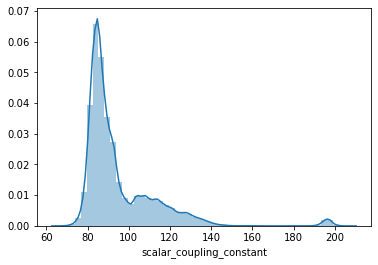

MIN:  65.3451
MIN:  207.709
SIZE:  709133


In [106]:
sns.distplot(df_a["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_a["scalar_coupling_constant"].min())
print("MIN: ",df_a["scalar_coupling_constant"].max())
print("SIZE: ",df_a.shape[0])

Feature ranking:
1. feature 6 (0.563991)
2. feature 2 (0.297942)
3. feature 5 (0.060270)
4. feature 7 (0.051372)
5. feature 8 (0.018678)
6. feature 9 (0.003903)
7. feature 3 (0.001924)
8. feature 4 (0.001919)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


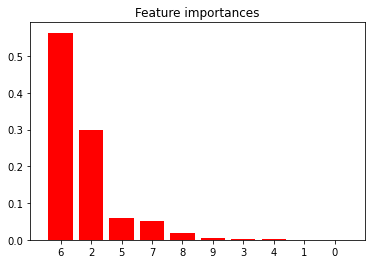

In [57]:
feature_importance(X,y)

In [23]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [59]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

In [60]:
print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.9783334609675094
mse:  8.99017987591538
ACIERTO CON +/- 0.5 :  29.504255184132784 %
ACIERTO CON +/- 1 :  47.50505898030699 %
ACIERTO CON +/- 5 :  91.59045879839522 %
ACIERTO CON +/- 10 :  98.50169572789385 %
ACIERTO CON +/- 15 :  99.65944425250481 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15513/15513 [==============================] - 29s 2ms/step - loss: 175.0594 - mae: 8.3115 - mse: 175.0594: 1s - loss: 180.2486 - mae
Epoch 2/50
15513/15513 [==============================] - 29s 2ms/step - loss: 46.8257 - mae: 5.0931 - mse: 46.8257
Epoch 3/50
15513/15513 [==============================] - 29s 2ms/step - loss: 38.5841 - mae: 4.5448 - mse: 38.5841
Epoch 4/50


6649/6649 - 7s - loss: 18.6122 - mae: 3.1357 - mse: 18.6122
loss=  18.61217498779297
mae=  3.1357438564300537
mse=  18.61217498779297
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


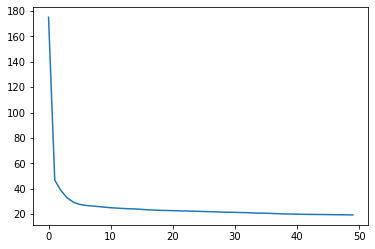

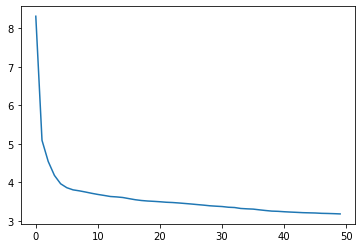

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  12.307511516405 %
ACIERTO CON +/- 1 :  23.859640876186894 %
ACIERTO CON +/- 5 :  80.70273573375952 %
ACIERTO CON +/- 10 :  96.78527780389207 %
ACIERTO CON +/- 15 :  99.31089592930337 %


In [102]:
red_neuronal_regress(X,y)

### 2JHH

In [27]:
df_b=df10[df10["type"]=='2JHH']
del df_b["type"]
df_b.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_b[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_b[[ 'scalar_coupling_constant']])

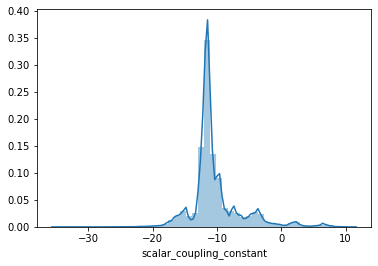

MIN:  -35.2709
MAX 11.2166
SIZE:  377988


In [108]:
sns.distplot(df_b["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_b["scalar_coupling_constant"].min())
print("MAX",df_b["scalar_coupling_constant"].max())
print("SIZE: ",df_b.shape[0])

Feature ranking:
1. feature 2 (0.649645)
2. feature 8 (0.165357)
3. feature 6 (0.082825)
4. feature 5 (0.051712)
5. feature 7 (0.030045)
6. feature 9 (0.012223)
7. feature 3 (0.004514)
8. feature 4 (0.003679)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


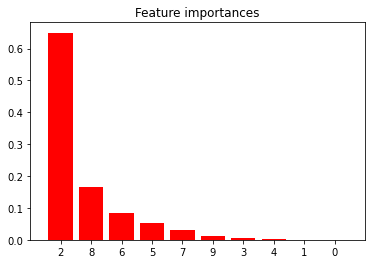

In [64]:
feature_importance(X,y)

In [66]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [67]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.9458684314055893
mse:  0.9306365833578278
ACIERTO CON +/- 0.5 :  66.07979047064737 %
ACIERTO CON +/- 1 :  84.63980528585412 %
ACIERTO CON +/- 5 :  99.65342998492024 %
ACIERTO CON +/- 10 :  99.9973544273658 %
ACIERTO CON +/- 15 :  99.99867721368291 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8269/8269 [==============================] - 16s 2ms/step - loss: 9.9065 - mae: 2.1980 - mse: 9.9065
Epoch 2/50
8269/8269 [==============================] - 16s 2ms/step - loss: 6.0121 - mae: 1.7459 - mse: 6.0121
Epoch 3/50
8269/8269 [==============================] - 16s 2ms/step - loss: 4.9559 - mae: 1.5955 - mse: 4.9559: 2s - los
Epoch 4/50
8269/8269 [====================

3544/3544 - 4s - loss: 3.1293 - mae: 1.2103 - mse: 3.1293
loss=  3.1293153762817383
mae=  1.2103440761566162
mse=  3.1293153762817383
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


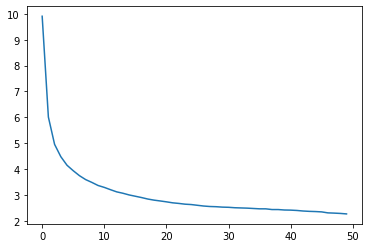

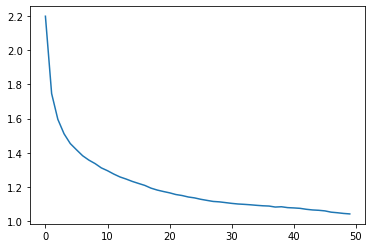

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  35.54767762815595 %
ACIERTO CON +/- 1 :  57.9706694180622 %
ACIERTO CON +/- 5 :  97.86149545402436 %
ACIERTO CON +/- 10 :  99.96560755575544 %
ACIERTO CON +/- 15 :  99.99911814245527 %


In [68]:
red_neuronal_regress(X,y)

### 1JHN

In [28]:
df_c=df10[df10["type"]=='1JHN']
del df_c["type"]
df_c.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_c[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_c[[ 'scalar_coupling_constant']])

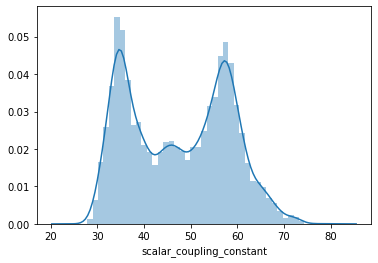

MIN:  24.3222
MAX:  81.3994
SIZE:  43680


In [109]:
sns.distplot(df_c["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_c["scalar_coupling_constant"].min())
print("MAX: ",df_c["scalar_coupling_constant"].max())
print("SIZE: ",df_c.shape[0])

Feature ranking:
1. feature 2 (0.817433)
2. feature 5 (0.085665)
3. feature 7 (0.061375)
4. feature 8 (0.017914)
5. feature 6 (0.012397)
6. feature 9 (0.002449)
7. feature 3 (0.001443)
8. feature 4 (0.001323)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


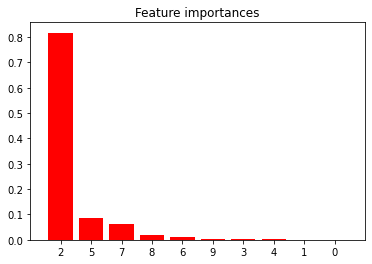

In [71]:
feature_importance(X,y)

In [72]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [73]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.9803083207691826
mse:  2.3572625236596694
ACIERTO CON +/- 0.5 :  47.00091575091575 %
ACIERTO CON +/- 1 :  69.95192307692307 %
ACIERTO CON +/- 5 :  98.61492673992674 %
ACIERTO CON +/- 10 :  99.81684981684981 %
ACIERTO CON +/- 15 :  99.9198717948718 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
956/956 [==============================] - 2s 2ms/step - loss: 212.1864 - mae: 11.5432 - mse: 212.1864
Epoch 2/50
956/956 [==============================] - 2s 2ms/step - loss: 111.1417 - mae: 9.3263 - mse: 111.1417A: 1s - loss: 114.1763 - mae:
Epoch 3/50
956/956 [==============================] - 2s 2ms/step - loss: 97.9085 - mae: 8.5948 - mse: 97.9085
Epoch 4/50
956/956 [=

410/410 - 0s - loss: 8.8502 - mae: 2.3401 - mse: 8.8502
loss=  8.85019588470459
mae=  2.34005069732666
mse=  8.85019588470459
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


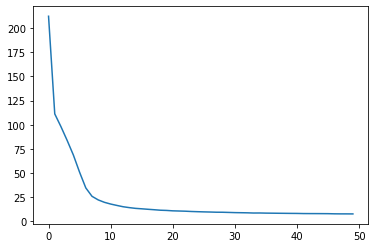

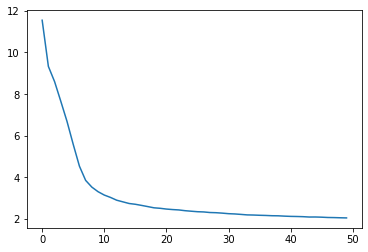

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  13.057081807081808 %
ACIERTO CON +/- 1 :  25.94627594627595 %
ACIERTO CON +/- 5 :  92.41452991452992 %
ACIERTO CON +/- 10 :  99.64896214896216 %
ACIERTO CON +/- 15 :  99.88553113553114 %


In [74]:
red_neuronal_regress(X,y)

### 2JHN

In [29]:
df_d=df10[df10["type"]=='2JHN']
X = np.asanyarray(df_d[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_d[[ 'scalar_coupling_constant']])

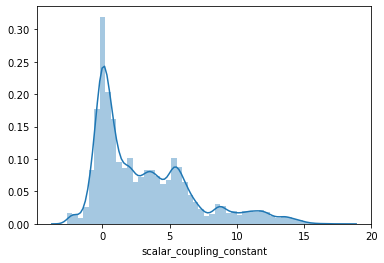

MIN:  -2.62085
MAX:  17.7436
SIZE:  119059


In [110]:
sns.distplot(df_d["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_d["scalar_coupling_constant"].min())
print("MAX: ",df_d["scalar_coupling_constant"].max())
print("SIZE: ",df_d.shape[0])

Feature ranking:
1. feature 7 (0.481799)
2. feature 2 (0.148860)
3. feature 6 (0.144434)
4. feature 8 (0.138797)
5. feature 5 (0.068205)
6. feature 9 (0.009865)
7. feature 3 (0.004564)
8. feature 4 (0.003475)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


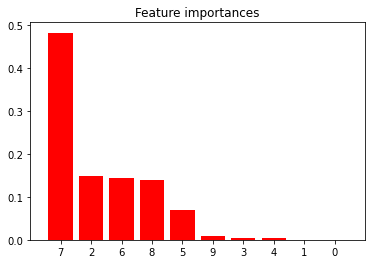

In [77]:
feature_importance(X,y)

In [78]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [79]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.8193955880406661
mse:  2.7904166873589746
ACIERTO CON +/- 0.5 :  62.25432555014279 %
ACIERTO CON +/- 1 :  77.73811523601546 %
ACIERTO CON +/- 5 :  94.83453720813036 %
ACIERTO CON +/- 10 :  99.99160087350916 %
ACIERTO CON +/- 15 :  100.0 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2605/2605 [==============================] - 4s 2ms/step - loss: 11.4252 - mae: 2.7232 - mse: 11.4252
Epoch 2/50
2605/2605 [==============================] - 4s 2ms/step - loss: 9.5433 - mae: 2.4372 - mse: 9.5433
Epoch 3/50
2605/2605 [==============================] - 5s 2ms/step - loss: 8.4132 - mae: 2.2464 - mse: 8.4132
Epoch 4/50
2605/2605 [==============================]

loss=  3.2717137336730957
mae=  1.3432016372680664
mse=  3.2717137336730957
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


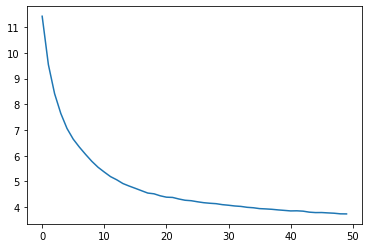

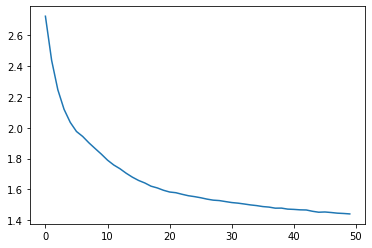

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  27.25796517162215 %
ACIERTO CON +/- 1 :  49.00330365641973 %
ACIERTO CON +/- 5 :  98.53015286410213 %
ACIERTO CON +/- 10 :  99.97480262052747 %
ACIERTO CON +/- 15 :  100.0 %


In [80]:
red_neuronal_regress(X,y)

### 2JHC

In [30]:
df_e=df10[df10["type"]=='2JHC']
X = np.asanyarray(df_e[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_e[[ 'scalar_coupling_constant']])

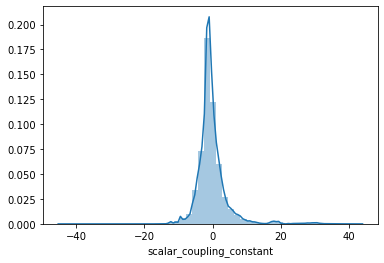

MIN:  -44.7605
MAX:  43.4072
SIZE:  1140867


In [112]:
sns.distplot(df_e["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_e["scalar_coupling_constant"].min())
print("MAX: ",df_e["scalar_coupling_constant"].max())
print("SIZE: ",df_e.shape[0])

Feature ranking:
1. feature 8 (0.262895)
2. feature 7 (0.206125)
3. feature 6 (0.183872)
4. feature 2 (0.165990)
5. feature 5 (0.144989)
6. feature 9 (0.015536)
7. feature 3 (0.010509)
8. feature 4 (0.010084)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


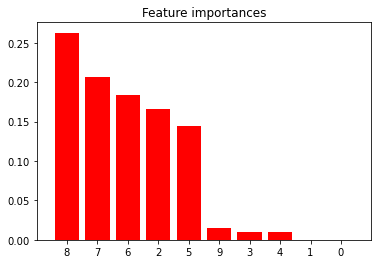

In [83]:
feature_importance(X,y)

In [109]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [110]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.8285771345981291
mse:  4.079959399957791
ACIERTO CON +/- 0.5 :  49.20762225319274 %
ACIERTO CON +/- 1 :  67.69351459850816 %
ACIERTO CON +/- 5 :  96.76825580478057 %
ACIERTO CON +/- 10 :  99.5538492553928 %
ACIERTO CON +/- 15 :  99.87421879793492 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24957/24957 [==============================] - 42s 2ms/step - loss: 13.1975 - mae: 2.1961 - mse: 13.1975: 4s -
Epoch 2/50
24957/24957 [==============================] - 42s 2ms/step - loss: 10.7276 - mae: 2.0209 - mse: 10.7276
Epoch 3/50
24957/24957 [==============================] - 41s 2ms/step - loss: 9.6824 - mae: 1.9431 - mse: 9.6824
Epoch 4/50
24957/24957 [============

10696/10696 - 12s - loss: 5.1540 - mae: 1.4587 - mse: 5.1540
loss=  5.154040336608887
mae=  1.4587328433990479
mse=  5.154040336608887
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


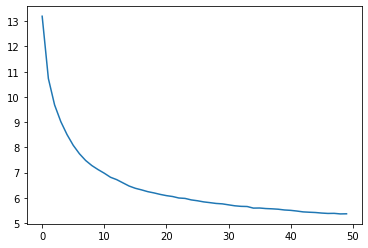

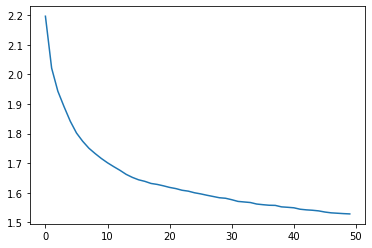

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  29.052097668153838 %
ACIERTO CON +/- 1 :  51.955379082045575 %
ACIERTO CON +/- 5 :  96.31041807275734 %
ACIERTO CON +/- 10 :  99.53047528056074 %
ACIERTO CON +/- 15 :  99.82527953813026 %


In [85]:
red_neuronal_regress(X,y)

### 3JHH

In [31]:
df_f=df10[df10["type"]=='3JHH']
X = np.asanyarray(df_f[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_f[[ 'scalar_coupling_constant']])

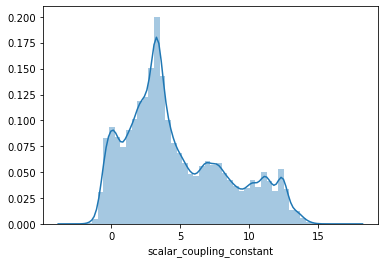

MIN:  -3.02046
MAX:  17.3782
SIZE:  590529


In [114]:
sns.distplot(df_f["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_f[ 'scalar_coupling_constant'].min())
print("MAX: ",df_f[ 'scalar_coupling_constant'].max())
print("SIZE: ",df_f.shape[0])

Feature ranking:
1. feature 8 (0.469411)
2. feature 6 (0.344099)
3. feature 2 (0.064069)
4. feature 5 (0.063525)
5. feature 7 (0.046656)
6. feature 9 (0.005895)
7. feature 4 (0.003187)
8. feature 3 (0.003158)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


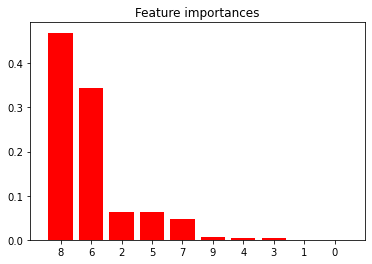

In [88]:
feature_importance(X,y)

In [112]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [113]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.9620480481530707
mse:  0.5382719381001887
ACIERTO CON +/- 0.5 :  69.39952246287233 %
ACIERTO CON +/- 1 :  87.53323285861853 %
ACIERTO CON +/- 5 :  99.9026298409903 %
ACIERTO CON +/- 10 :  100.0 %
ACIERTO CON +/- 15 :  100.0 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12918/12918 [==============================] - 20s 2ms/step - loss: 5.8043 - mae: 1.7932 - mse: 5.8043
Epoch 2/50
12918/12918 [==============================] - 20s 2ms/step - loss: 4.3538 - mae: 1.5201 - mse: 4.3538
Epoch 3/50
12918/12918 [==============================] - 20s 2ms/step - loss: 3.7922 - mae: 1.4147 - mse: 3.7922
Epoch 4/50
12918/12918 [======================

5537/5537 - 6s - loss: 1.7675 - mae: 1.0102 - mse: 1.7675
loss=  1.76752769947052
mae=  1.010217547416687
mse=  1.76752769947052
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


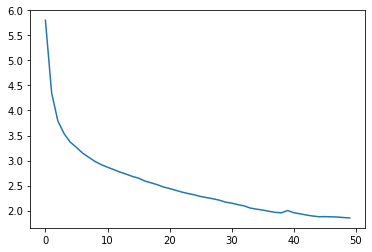

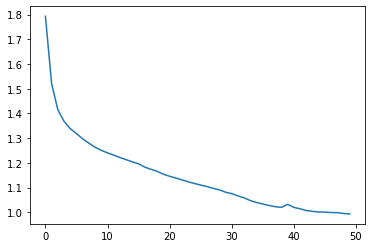

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  32.94215930322479 %
ACIERTO CON +/- 1 :  60.48577831213768 %
ACIERTO CON +/- 5 :  99.76969840651618 %
ACIERTO CON +/- 10 :  99.99774214124035 %
ACIERTO CON +/- 15 :  99.99943553531008 %


In [90]:
red_neuronal_regress(X,y)

### 3JHC

In [32]:
df_g=df10[df10["type"]=='3JHC']
X = np.asanyarray(df_g[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_g[[ 'scalar_coupling_constant']])

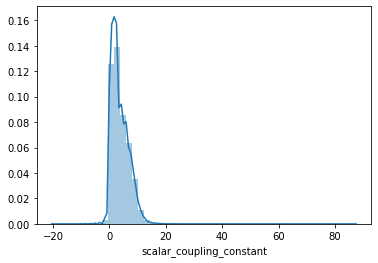

MIN:  -19.8942
MAX:  86.9551
SIZE:  1511207


In [115]:
sns.distplot(df_g["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_g[ 'scalar_coupling_constant'].min())
print("MAX: ",df_g[ 'scalar_coupling_constant'].max())
print("SIZE: ",df_g.shape[0])

Feature ranking:
1. feature 8 (0.436382)
2. feature 2 (0.145709)
3. feature 6 (0.130236)
4. feature 7 (0.103963)
5. feature 5 (0.096271)
6. feature 9 (0.036378)
7. feature 4 (0.029436)
8. feature 3 (0.021624)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


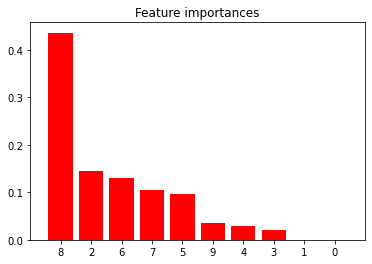

In [93]:
feature_importance(X,y)

In [115]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [116]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.7371205664739193
mse:  2.5335508119577788
ACIERTO CON +/- 0.5 :  39.9808762514806 %
ACIERTO CON +/- 1 :  61.72305635881181 %
ACIERTO CON +/- 5 :  98.65670555382773 %
ACIERTO CON +/- 10 :  99.95467208395921 %
ACIERTO CON +/- 15 :  99.99702225369074 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
33058/33058 [==============================] - 54s 2ms/step - loss: 6.2355 - mae: 1.8588 - mse: 6.2355
Epoch 2/50
33058/33058 [==============================] - 54s 2ms/step - loss: 5.6337 - mae: 1.7427 - mse: 5.6337
Epoch 3/50
33058/33058 [==============================] - 54s 2ms/step - loss: 5.4995 - mae: 1.7144 - mse: 5.4995
Epoch 4/50
33058/33058 [======================

14168/14168 - 15s - loss: 5.4563 - mae: 1.7408 - mse: 5.4563
loss=  5.456309795379639
mae=  1.7407854795455933
mse=  5.456309795379639
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


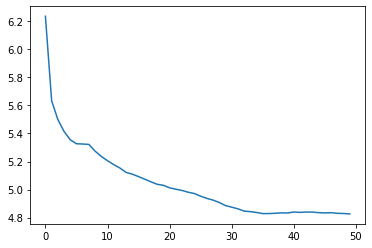

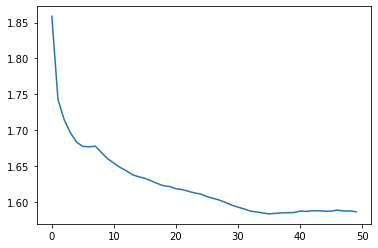

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  19.34542518908689 %
ACIERTO CON +/- 1 :  38.60438544830522 %
ACIERTO CON +/- 5 :  95.33927559152379 %
ACIERTO CON +/- 10 :  99.90603556090815 %
ACIERTO CON +/- 15 :  99.97022253690751 %


In [95]:
red_neuronal_regress(X,y)

### 3JHN

In [33]:
df_h=df10[df10["type"]=='3JHN']
X = np.asanyarray(df_h[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_h[[ 'scalar_coupling_constant']])

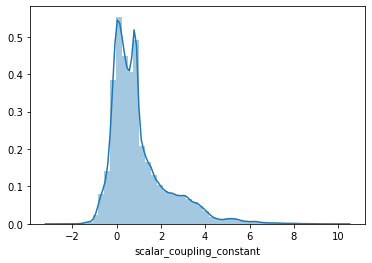

MIN:  -2.9403099999999998
MAX:  10.2491
SIZE:  166613


In [116]:
sns.distplot(df_h["scalar_coupling_constant"])
plt.show()
print("MIN: ",df_h[ 'scalar_coupling_constant'].min())
print("MAX: ",df_h[ 'scalar_coupling_constant'].max())
print("SIZE: ",df_h.shape[0])

Feature ranking:
1. feature 8 (0.342457)
2. feature 6 (0.204411)
3. feature 2 (0.151963)
4. feature 7 (0.138539)
5. feature 5 (0.106481)
6. feature 4 (0.021995)
7. feature 9 (0.019782)
8. feature 3 (0.014371)
9. feature 1 (0.000000)
10. feature 0 (0.000000)


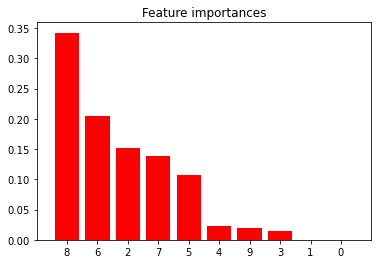

In [98]:
feature_importance(X,y)

In [118]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [119]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random(yhat,ytest)

R2_squared:  0.8225901322178322
mse:  0.3112703796088038
ACIERTO CON +/- 0.5 :  76.11559583470876 %
ACIERTO CON +/- 1 :  91.10824355550221 %
ACIERTO CON +/- 5 :  99.99099720913483 %
ACIERTO CON +/- 10 :  100.0 %
ACIERTO CON +/- 15 :  100.0 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3645/3645 [==============================] - 6s 2ms/step - loss: 1.5690 - mae: 0.9103 - mse: 1.5690
Epoch 2/50
3645/3645 [==============================] - 6s 2ms/step - loss: 1.4799 - mae: 0.8728 - mse: 1.4799
Epoch 3/50
3645/3645 [==============================] - 6s 2ms/step - loss: 1.4461 - mae: 0.8594 - mse: 1.4461
Epoch 4/50
3645/3645 [==============================] -

1562/1562 - 2s - loss: 1.3034 - mae: 0.8195 - mse: 1.3034
loss=  1.3034330606460571
mae=  0.8194753527641296
mse=  1.3034330606460571
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


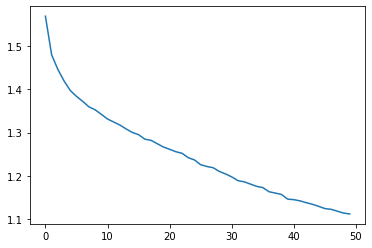

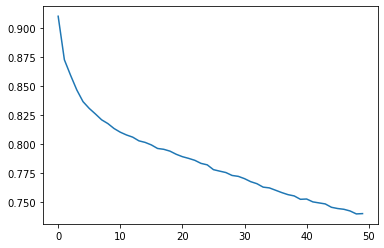

Porcentaje de acierto con Keras:
ACIERTO CON +/- 0.5 :  45.94870358514725 %
ACIERTO CON +/- 1 :  70.65060819462228 %
ACIERTO CON +/- 5 :  99.88396286811779 %
ACIERTO CON +/- 10 :  100.0 %
ACIERTO CON +/- 15 :  100.0 %


In [100]:
red_neuronal_regress(X,y)

In [36]:
df_size=pd.DataFrame()
df_size["ENLACE"]=['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN']
df_size["SIZE"]=[df_a.shape[0],df_b.shape[0],df_c.shape[0],df_d.shape[0],df_e.shape[0],df_f.shape[0],df_g.shape[0],df_h.shape[0]]

In [9]:
#index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       #['%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5"]], 
                                      #names=['COUPLE', 'OUTCOME'])
#RES = pd.DataFrame(index=index,  columns=["KERAS","RANDOM FOREST REGRESSOR"])
RES=pd.DataFrame()
RES["ENLACE"]=['1JHC','1JHC','1JHC','2JHH','2JHH','2JHH','1JHN','1JHN','1JHN','2JHN','2JHN','2JHN','2JHC','2JHC','2JHC','3JHH','3JHH','3JHH','3JHC','3JHC','3JHC','3JHN','3JHN','3JHN']
RES["PRECISION"]=['%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5",'%SUCCESS RANGE +/- 5',"%SUCCESS RANGE +/- 1","%SUCCESS RANGE +/-0.5"]
RES["RANDOM FOREST REGRESSOR"]=[91.59,47.50,29.50,99.65,84.63,66.08,98.61,69.95,47.00,94.83,77.74,62.25,96.76,67.69,49.20,99.90,87.53,69.40,98.66,61.72,39.98,99.99,91.11,76.12]
RES["KERAS"]=[80.70,23.85,12.30,97.86,57.97,35.54,92.41,25.94,13.05,98.53,49.00,27.25,96.31,51.95,29.05,99.76,60.48,32.94,95.33,38.61,19.35,99.88,70.65,45.95]
RES

,ENLACE,PRECISION,RANDOM FOREST REGRESSOR,KERAS
0,1JHC,%SUCCESS RANGE +/- 5,91.59,80.70
1,1JHC,%SUCCESS RANGE +/- 1,47.50,23.85
2,1JHC,%SUCCESS RANGE +/-0.5,29.50,12.30
3,2JHH,%SUCCESS RANGE +/- 5,99.65,97.86
4,2JHH,%SUCCESS RANGE +/- 1,84.63,57.97
5,2JHH,%SUCCESS RANGE +/-0.5,66.08,35.54
6,1JHN,%SUCCESS RANGE +/- 5,98.61,92.41
7,1JHN,%SUCCESS RANGE +/- 1,69.95,25.94
8,1JHN,%SUCCESS RANGE +/-0.5,47.00,13.05
9,2JHN,%SUCCESS RANGE +/- 5,94.83,98.53


In [13]:
Precision1=RES[RES["PRECISION"]=="%SUCCESS RANGE +/- 1"].sort_values(by="RANDOM FOREST REGRESSOR",ascending=False)

In [ ]:
# index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       #['R2-SQUARED',"MSE"]], 
                                      #names=['COUPLE', 'OUTCOME'])
#RES2 = pd.DataFrame(index=index,  columns=["RANDOM FOREST REGRESSOR"])
RES2=pd.DataFrame()
RES2["ENLACE"]=['1JHC','1JHC','2JHH','2JHH','1JHN','1JHN','2JHN','2JHN','2JHC','2JHC','3JHH','3JHH','3JHC','3JHC','3JHN','3JHN']
RES2["METRICAS"]=['R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE"]
RES2["RANDOM FOREST REGRESSOR"]=[0.9783,8.99,0.9458,0.9306,0.9803,2.35,0.8194,2.79,0.8286,4.08,0.9620,0.53,0.7371,2.53,0.8225,0.311]
RES2

In [21]:
precision_R2=RES2[RES2["METRICAS"]=="R2-SQUARED"].sort_values(by="RANDOM FOREST REGRESSOR",ascending=False)
precision_MSE=RES2[RES2["METRICAS"]=="MSE"].sort_values(by="RANDOM FOREST REGRESSOR")

In [123]:
index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       ['MAE',"MSE"]], 
                                      names=['COUPLE', 'OUTCOME'])
RES3 = pd.DataFrame(index=index,  columns=["KERAS"])
RES3["KERAS"]=[3.13,18.6,1.21,3.13,2.34,8.85,1.34,3.27,1.45,5.15,1.01,1.76,1.74,5.45,0.81,1.30]
RES3

KERAS
COUPLE OUTCOME       
1JHC   MAE       3.13
       MSE      18.60
2JHH   MAE       1.21
       MSE       3.13
1JHN   MAE       2.34
       MSE       8.85
2JHN   MAE       1.34
       MSE       3.27
2JHC   MAE       1.45
       MSE       5.15
3JHH   MAE       1.01
       MSE       1.76
3JHC   MAE       1.74
       MSE       5.45
3JHN   MAE       0.81
       MSE       1.30

#### CONCLUSIONES:

- Keras es un buen algoritmo y en muchos casos se acerca mucho a Random Forest, pero Random Forest es siempre el que alcanza mayor precision.
- La relacion de scalar coupling constant con las diferentes variables es muy diferente para cada tipo de enlace.
    + La relacion de scalar coupling en el primer enlace, 1JHC esta fuertemente ligada a la distancia euclideana entre su par de átomos.
    + En el resto de enlaces el peso de las variables esta mas repartido, aunque la distancia euclideana siempre supone un peso significativo junto con producto punto, sd, pso y dso.
    + El tipo de atomo no guarda apenas relacion con nuestra target en ninguno de los enlaces.
- La precision en cuantos a acierto en rango +/- 1, R2-score y MSE es muy variable en cuanto al tipo de enlace. En algunos casos puede deberse a que los datos tienen un tamaño diferente por cada enlace, aunque en el caso de 2JHC y 3JHC la precision disminuye aun teniendo un tamaño de datos bastante alto.


In [39]:
Precision1=Precision1[["ENLACE","PRECISION","RANDOM FOREST REGRESSOR"]]
precision1=pd.merge(left=Precision1,right=df_size,on=["ENLACE"])
precision1

,ENLACE,PRECISION,RANDOM FOREST REGRESSOR,SIZE
0,3JHN,%SUCCESS RANGE +/- 1,91.11,166613
1,3JHH,%SUCCESS RANGE +/- 1,87.53,590529
2,2JHH,%SUCCESS RANGE +/- 1,84.63,377988
3,2JHN,%SUCCESS RANGE +/- 1,77.74,119059
4,1JHN,%SUCCESS RANGE +/- 1,69.95,43680
5,2JHC,%SUCCESS RANGE +/- 1,67.69,1140867
6,3JHC,%SUCCESS RANGE +/- 1,61.72,1511207
7,1JHC,%SUCCESS RANGE +/- 1,47.50,709133


In [22]:
precision_R2

,ENLACE,METRICAS,RANDOM FOREST REGRESSOR
4,1JHN,R2-SQUARED,0.9803
0,1JHC,R2-SQUARED,0.9783
10,3JHH,R2-SQUARED,0.9620
2,2JHH,R2-SQUARED,0.9458
8,2JHC,R2-SQUARED,0.8286
14,3JHN,R2-SQUARED,0.8225
6,2JHN,R2-SQUARED,0.8194
12,3JHC,R2-SQUARED,0.7371


In [23]:
precision_MSE

,ENLACE,METRICAS,RANDOM FOREST REGRESSOR
15,3JHN,MSE,0.3110
11,3JHH,MSE,0.5300
3,2JHH,MSE,0.9306
5,1JHN,MSE,2.3500
13,3JHC,MSE,2.5300
7,2JHN,MSE,2.7900
9,2JHC,MSE,4.0800
1,1JHC,MSE,8.9900


## 2. Con contribución de Fermi

In [34]:
#Acierto para Random forset
def acierto_random2(yhat,y_test):
    for j in range(0,4):
        acertados=0
        for i in range(0,len(y_test)):
            pred=round(yhat[i],j)
            real=round(y_test[i][0],j)
            if pred==real:
                acertados+=1
        acierto=(acertados/len(y_test)*100)
        print("ACIERTO CON ",j,"DECIMALES: ",acierto,"%")

In [22]:
#Acierto para Red con Keras
def acierto_red2(predictions,y_test):
    yhat2=predictions.tolist()
    ytest2=y_test.tolist()
    for j in range(0,4):
        acertados=0
        for i in range(0,len(ytest2)):
            pred=round(yhat2[i][0],j)
            real=round(ytest2[i][0],j)
            if pred==real:
                acertados+=1
        acierto=(acertados/len(ytest2)*100)
        print("ACIERTO CON ",j,"DECIMALES: ",acierto,"%")

In [23]:
def red_neuronal_regress2(X,y):
    #HOLD OUT
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    #Construyo el modelo
    model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[0],X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1) #el 10 es necesario porque son 10 clases 
    ])
    # Elegimos hiperparametros 
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=optimizer,loss='mse',metrics=['mae', 'mse'])
    history=model.fit(X_train, y_train, epochs=50, verbose=1)
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
    print("loss= ",loss)
    print("mae= ",mae)
    print("mse= ",mse)
    predictions = model.predict(X_test)
    plt.plot(history.history["mse"])
    plt.show()
    plt.plot(history.history["mae"])
    plt.show()
    predictions =model.predict(X_test)
    print("Porcentaje de acierto con Keras:")
    acierto_red2(predictions,y_test)
    return model

### JHC

In [24]:
df_a2=df10[df10["type"]=="1JHC"]
df_a2.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_a2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_a2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.999798)
2. feature 8 (0.000147)
3. feature 5 (0.000031)
4. feature 9 (0.000013)
5. feature 2 (0.000006)
6. feature 7 (0.000005)
7. feature 10 (0.000000)
8. feature 3 (0.000000)
9. feature 4 (0.000000)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


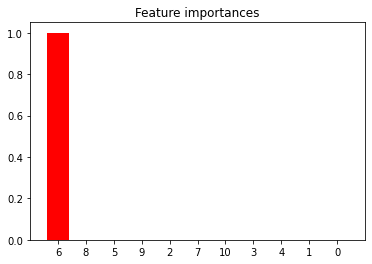

In [137]:
feature_importance(X,y)

In [25]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [35]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9999851361453523
mse:  0.006167516036201311
ACIERTO CON  0 DECIMALES:  97.45676070141792 %
ACIERTO CON  1 DECIMALES:  75.69574199552976 %
ACIERTO CON  2 DECIMALES:  18.918118552884852 %
ACIERTO CON  3 DECIMALES:  1.9382769148328598 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15513/15513 [==============================] - 29s 2ms/step - loss: 50.8569 - mae: 2.2199 - mse: 50.8569: 0s - loss: 52.3407 - mae: 
Epoch 2/50
15513/15513 [==============================] - 29s 2ms/step - loss: 1.3021 - mae: 1.0519 - mse: 1.3021
Epoch 3/50
15513/15513 [==============================] - 33s 2ms/step - loss: 1.0706 - mae: 0.9754 - mse: 1.0706
Epoch 4/50
15513

6649/6649 - 8s - loss: 0.1602 - mae: 0.3977 - mse: 0.1602
loss=  0.16021209955215454
mae=  0.39771369099617004
mse=  0.16021209955215454
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


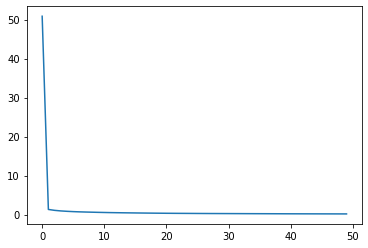

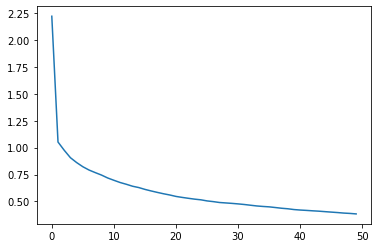

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  60.22938798533421 %
ACIERTO CON  1 DECIMALES:  0.0 %
ACIERTO CON  2 DECIMALES:  0.0 %
ACIERTO CON  3 DECIMALES:  0.0 %


In [36]:
red_neuronal_regress2(X,y)

### JHH

In [43]:
df_b2=df10[df10["type"]=='2JHH']
del df_b2["type"]
df_b2.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_b2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_b2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.999297)
2. feature 9 (0.000395)
3. feature 2 (0.000241)
4. feature 7 (0.000028)
5. feature 8 (0.000025)
6. feature 5 (0.000010)
7. feature 10 (0.000002)
8. feature 3 (0.000001)
9. feature 4 (0.000001)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


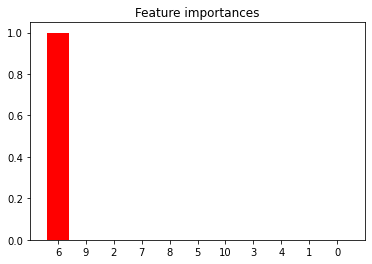

In [44]:
feature_importance(X,y)

In [45]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [46]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9999755464835
mse:  0.00042040786250319005
ACIERTO CON  0 DECIMALES:  98.82536575041668 %
ACIERTO CON  1 DECIMALES:  88.76425302256673 %
ACIERTO CON  2 DECIMALES:  35.573692425725554 %
ACIERTO CON  3 DECIMALES:  4.508055768671128 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8269/8269 [==============================] - 14s 2ms/step - loss: 2.8359 - mae: 1.1501 - mse: 2.8359
Epoch 2/50
8269/8269 [==============================] - 14s 2ms/step - loss: 0.5659 - mae: 0.6455 - mse: 0.5659
Epoch 3/50
8269/8269 [==============================] - 14s 2ms/step - loss: 0.3851 - mae: 0.5165 - mse: 0.3851
Epoch 4/50
8269/8269 [==============================

3544/3544 - 4s - loss: 0.0541 - mae: 0.2263 - mse: 0.0541
loss=  0.05411908030509949
mae=  0.22627371549606323
mse=  0.05411908030509949
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


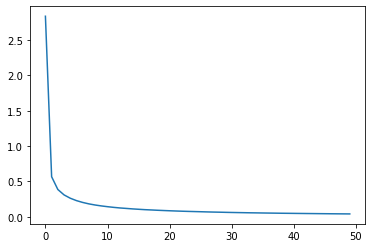

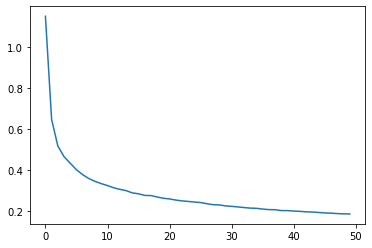

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  75.36354577281585 %
ACIERTO CON  1 DECIMALES:  0.346570015079764 %
ACIERTO CON  2 DECIMALES:  0.0220464386183056 %
ACIERTO CON  3 DECIMALES:  0.0017637150894644481 %


In [47]:
red_neuronal_regress2(X,y)

### 1JHN

In [48]:
df_c2=df10[df10["type"]=='1JHN']
del df_c2["type"]
df_c2.reset_index(drop=True,inplace=True)
X = np.asanyarray(df_c2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_c2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.999675)
2. feature 8 (0.000283)
3. feature 2 (0.000013)
4. feature 5 (0.000012)
5. feature 7 (0.000008)
6. feature 9 (0.000007)
7. feature 10 (0.000001)
8. feature 3 (0.000001)
9. feature 4 (0.000001)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


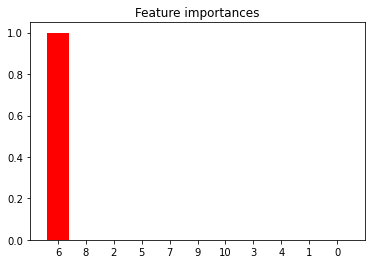

In [49]:
feature_importance(X,y)

In [50]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [51]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9999858852305743
mse:  0.0016896586932634403
ACIERTO CON  0 DECIMALES:  97.52747252747253 %
ACIERTO CON  1 DECIMALES:  76.92307692307693 %
ACIERTO CON  2 DECIMALES:  17.685439560439562 %
ACIERTO CON  3 DECIMALES:  1.8658424908424909 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
956/956 [==============================] - 2s 2ms/step - loss: 191.7893 - mae: 10.6180 - mse: 191.7893
Epoch 2/50
956/956 [==============================] - 2s 2ms/step - loss: 21.7901 - mae: 3.5374 - mse: 21.7901
Epoch 3/50
956/956 [==============================] - 2s 2ms/step - loss: 2.8958 - mae: 1.3510 - mse: 2.8958
Epoch 4/50
956/956 [==============================] - 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


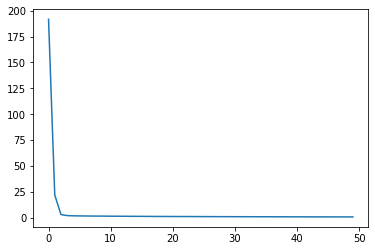

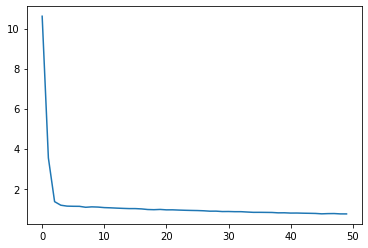

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  19.635225885225886 %
ACIERTO CON  1 DECIMALES:  0.045787545787545784 %
ACIERTO CON  2 DECIMALES:  0.0 %
ACIERTO CON  3 DECIMALES:  0.0 %


In [52]:
red_neuronal_regress2(X,y)

### 2JHN

In [53]:
df_d2=df10[df10["type"]=='2JHN']
X = np.asanyarray(df_d2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_d2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.997709)
2. feature 8 (0.001227)
3. feature 9 (0.000899)
4. feature 7 (0.000096)
5. feature 5 (0.000032)
6. feature 2 (0.000032)
7. feature 10 (0.000002)
8. feature 3 (0.000001)
9. feature 4 (0.000001)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


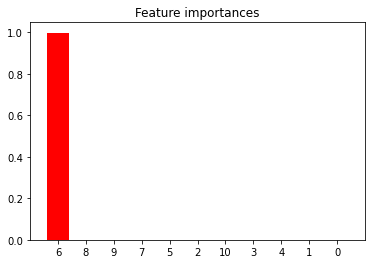

In [54]:
feature_importance(X,y)

In [55]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [56]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9996100781867882
mse:  0.006024461543035706
ACIERTO CON  0 DECIMALES:  98.93751049890811 %
ACIERTO CON  1 DECIMALES:  84.91096925919705 %
ACIERTO CON  2 DECIMALES:  36.37241726860406 %
ACIERTO CON  3 DECIMALES:  4.144968923231984 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2605/2605 [==============================] - 4s 2ms/step - loss: 7.1975 - mae: 2.0760 - mse: 7.1975A: 0s - loss: 7.3868 - mae: 2.1098 - mse: 7.
Epoch 2/50
2605/2605 [==============================] - 4s 2ms/step - loss: 1.7396 - mae: 1.0309 - mse: 1.7396
Epoch 3/50
2605/2605 [==============================] - 4s 2ms/step - loss: 1.2497 - mae: 0.8788 - mse: 1.2497
Epoch 4/50


1117/1117 - 1s - loss: 0.3260 - mae: 0.5016 - mse: 0.3260
loss=  0.32599419355392456
mae=  0.5015807151794434
mse=  0.32599419355392456
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


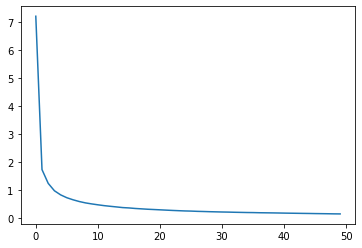

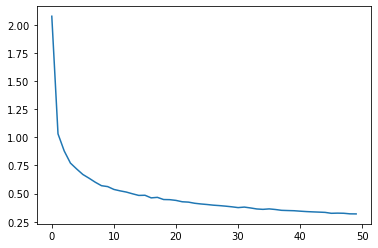

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  50.20157903578028 %
ACIERTO CON  1 DECIMALES:  5.6330141665266815 %
ACIERTO CON  2 DECIMALES:  0.5711406013774567 %
ACIERTO CON  3 DECIMALES:  0.05879388543591467 %


In [57]:
red_neuronal_regress2(X,y)

### 2JHC

In [58]:
df_e2=df10[df10["type"]=='2JHC']
X = np.asanyarray(df_e2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_e2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.988897)
2. feature 8 (0.009873)
3. feature 9 (0.000545)
4. feature 5 (0.000318)
5. feature 7 (0.000302)
6. feature 2 (0.000056)
7. feature 3 (0.000004)
8. feature 10 (0.000003)
9. feature 4 (0.000002)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


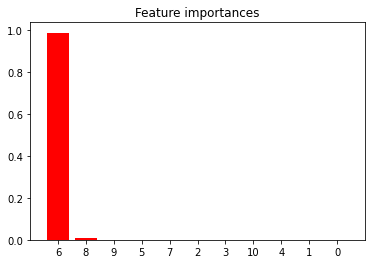

In [59]:
feature_importance(X,y)

In [60]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [61]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9998947015002466
mse:  0.002506162773928754
ACIERTO CON  0 DECIMALES:  97.92351451085575 %
ACIERTO CON  1 DECIMALES:  82.32752197884071 %
ACIERTO CON  2 DECIMALES:  30.050312480826037 %
ACIERTO CON  3 DECIMALES:  3.574026839166601 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24957/24957 [==============================] - 42s 2ms/step - loss: 1.7158 - mae: 0.9218 - mse: 1.7158
Epoch 2/50
24957/24957 [==============================] - 41s 2ms/step - loss: 0.3855 - mae: 0.5190 - mse: 0.3855: 1s - loss: 0.3878 - ma
Epoch 3/50
24957/24957 [==============================] - 41s 2ms/step - loss: 0.2508 - mae: 0.4251 - mse: 0.2508
Epoch 4/50
24957/24957

10696/10696 - 11s - loss: 0.0577 - mae: 0.2359 - mse: 0.0577
loss=  0.05767766386270523
mae=  0.23588533699512482
mse=  0.05767766386270523
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


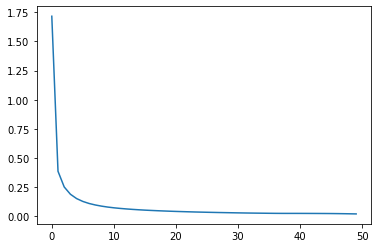

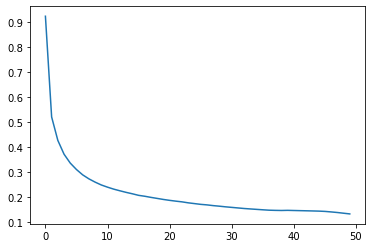

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  76.82996309833723 %
ACIERTO CON  1 DECIMALES:  0.8616231472472763 %
ACIERTO CON  2 DECIMALES:  0.0312626913378971 %
ACIERTO CON  3 DECIMALES:  0.0032139215394099826 %


In [62]:
red_neuronal_regress2(X,y)

### 3JHH

In [63]:
df_f2=df10[df10["type"]=='3JHH']
X = np.asanyarray(df_f2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_f2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.993477)
2. feature 9 (0.003398)
3. feature 7 (0.003007)
4. feature 2 (0.000076)
5. feature 8 (0.000026)
6. feature 5 (0.000011)
7. feature 10 (0.000002)
8. feature 4 (0.000002)
9. feature 3 (0.000002)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


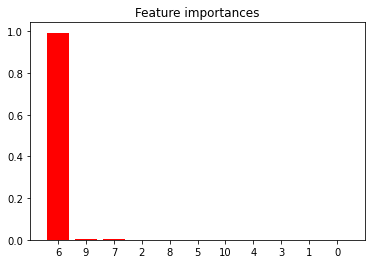

In [64]:
feature_importance(X,y)

In [65]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [66]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9999172600109171
mse:  0.0011734999681099242
ACIERTO CON  0 DECIMALES:  98.43445718253095 %
ACIERTO CON  1 DECIMALES:  86.05235974463618 %
ACIERTO CON  2 DECIMALES:  33.121941306961546 %
ACIERTO CON  3 DECIMALES:  3.9752425787004895 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12918/12918 [==============================] - 21s 2ms/step - loss: 2.0745 - mae: 1.0540 - mse: 2.0745
Epoch 2/50
12918/12918 [==============================] - 21s 2ms/step - loss: 0.6294 - mae: 0.6465 - mse: 0.6294
Epoch 3/50
12918/12918 [==============================] - 21s 2ms/step - loss: 0.4437 - mae: 0.5496 - mse: 0.4437
Epoch 4/50
12918/12918 [======================

5537/5537 - 6s - loss: 0.0483 - mae: 0.2112 - mse: 0.0483
loss=  0.048277921974658966
mae=  0.21115665137767792
mse=  0.048277921974658966
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


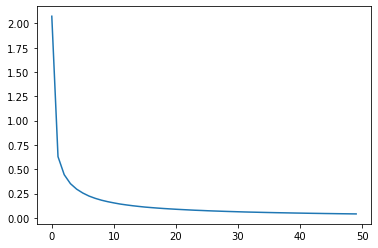

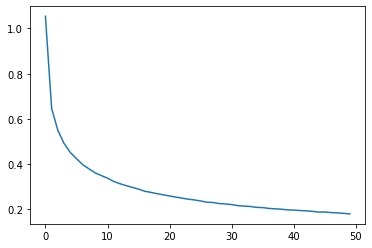

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  78.64178506313537 %
ACIERTO CON  1 DECIMALES:  1.2706100169903871 %
ACIERTO CON  2 DECIMALES:  0.05418861023148697 %
ACIERTO CON  3 DECIMALES:  0.003951252829379258 %


In [67]:
red_neuronal_regress2(X,y)

### 3JHC

In [68]:
df_g2=df10[df10["type"]=='3JHC']
X = np.asanyarray(df_g2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_g2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.998913)
2. feature 9 (0.000469)
3. feature 8 (0.000284)
4. feature 7 (0.000276)
5. feature 5 (0.000025)
6. feature 2 (0.000023)
7. feature 4 (0.000004)
8. feature 10 (0.000003)
9. feature 3 (0.000003)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


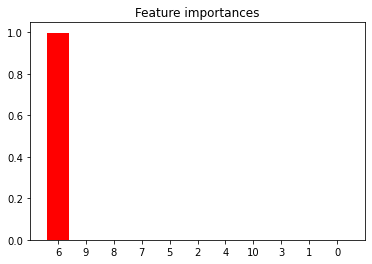

In [69]:
feature_importance(X,y)

In [70]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [71]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.9998877539284095
mse:  0.0010817929801617732
ACIERTO CON  0 DECIMALES:  98.33411637032576 %
ACIERTO CON  1 DECIMALES:  84.58519993912164 %
ACIERTO CON  2 DECIMALES:  33.42917264973101 %
ACIERTO CON  3 DECIMALES:  4.0887765432997405 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
33058/33058 [==============================] - 87s 3ms/step - loss: 1.1393 - mae: 0.8033 - mse: 1.1393
Epoch 2/50
33058/33058 [==============================] - 76s 2ms/step - loss: 0.3534 - mae: 0.5001 - mse: 0.3534
Epoch 3/50
33058/33058 [==============================] - 59s 2ms/step - loss: 0.2389 - mae: 0.4196 - mse: 0.2389
Epoch 4/50
33058/33058 [======================

14168/14168 - 17s - loss: 0.0088 - mae: 0.0914 - mse: 0.0088
loss=  0.008819042704999447
mae=  0.09139740467071533
mse=  0.008819042704999447
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


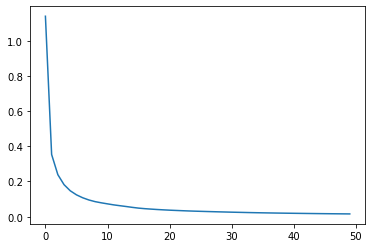

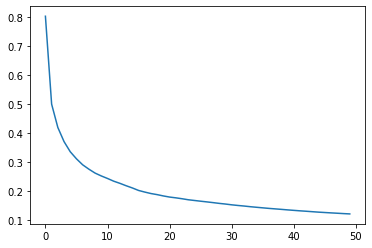

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  91.19226756484319 %
ACIERTO CON  1 DECIMALES:  13.046499162922427 %
ACIERTO CON  2 DECIMALES:  0.03176262729865472 %
ACIERTO CON  3 DECIMALES:  0.00397032841233184 %


In [72]:
red_neuronal_regress2(X,y)

### 3JHN

In [73]:
df_h2=df10[df10["type"]=='3JHN']
X = np.asanyarray(df_h2[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','fc','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_h2[[ 'scalar_coupling_constant']])

Feature ranking:
1. feature 6 (0.994787)
2. feature 8 (0.003497)
3. feature 9 (0.001047)
4. feature 7 (0.000363)
5. feature 5 (0.000195)
6. feature 2 (0.000086)
7. feature 10 (0.000010)
8. feature 4 (0.000008)
9. feature 3 (0.000008)
10. feature 1 (0.000000)
11. feature 0 (0.000000)


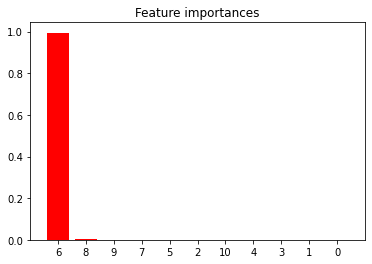

In [74]:
feature_importance(X,y)

In [75]:
RFR=kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [76]:
yhat=RFR[0]
ytest=RFR[1]
R2_squared=RFR[2]
mse=RFR[3]

print("R2_squared: ",R2_squared)
print("mse: ",mse)
acierto_random2(yhat,ytest)

R2_squared:  0.999751976631588
mse:  0.0004351636636821911
ACIERTO CON  0 DECIMALES:  99.00669207454311 %
ACIERTO CON  1 DECIMALES:  89.50874771179066 %
ACIERTO CON  2 DECIMALES:  42.72124358551151 %
ACIERTO CON  3 DECIMALES:  5.452690334003541 %


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3645/3645 [==============================] - 7s 2ms/step - loss: 1.4452 - mae: 0.8770 - mse: 1.4452A: 0s - loss: 1.4601 - mae: 0.8817 - mse:
Epoch 2/50
3645/3645 [==============================] - 7s 2ms/step - loss: 0.9829 - mae: 0.7333 - mse: 0.9829
Epoch 3/50
3645/3645 [==============================] - 7s 2ms/step - loss: 0.8083 - mae: 0.6559 - mse: 0.8083
Epoch 4/50
364

1562/1562 - 2s - loss: 0.0430 - mae: 0.1692 - mse: 0.0430
loss=  0.043041326105594635
mae=  0.16922162473201752
mse=  0.043041326105594635
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


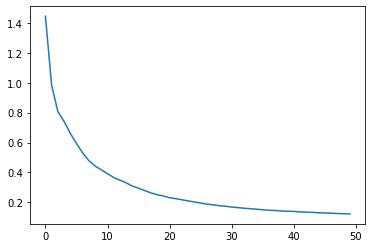

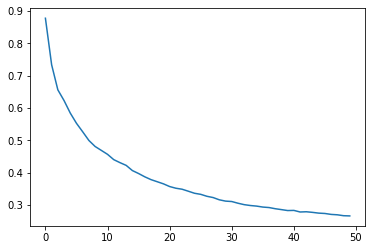

Porcentaje de acierto con Keras:
ACIERTO CON  0 DECIMALES:  85.84146927016644 %
ACIERTO CON  1 DECIMALES:  15.166853393085788 %
ACIERTO CON  2 DECIMALES:  1.5865076824583866 %
ACIERTO CON  3 DECIMALES:  0.15004801536491677 %


In [77]:
red_neuronal_regress2(X,y)

In [41]:
#index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       #['%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS"]], 
                                      #names=['COUPLE', 'OUTCOME'])
#RES = pd.DataFrame(index=index,  columns=["KERAS","RANDOM FOREST REGRESSOR"])
RES=pd.DataFrame()
RES["ENLACE"]=['1JHC','1JHC','1JHC','2JHH','2JHH','2JHH','1JHN','1JHN','1JHN','2JHN','2JHN','2JHN','2JHC','2JHC','2JHC','3JHH','3JHH','3JHH','3JHC','3JHC','3JHC','3JHN','3JHN','3JHN']
RES["PRECISION"]=['%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS",'%SUCCESS 0 FLOATS',"%SUCCESS 1 FLOATS","%SUCCESS 2 FLOATS"]
RES["RANDOM FOREST REGRESSOR"]=[97.45,75.70,18.92,98.83,88.76,35.57,97.53,76.92,17.69,98.94,84.81,36.37,97.92,82.32,30.05,98.43,86.05,33.12,98.33,84.58,33.42,99.01,89.51,42.72]
RES["KERAS"]=[60.23,0.00,0.00,75.36,0.34,0.02,19.63,0.04,0.00,50.20,5.63,0.05,76.82,0.86,0.03,78.64,1.27,0.05,91.19,13.04,0.03,85.84,15.16,1.59]
RES

,ENLACE,PRECISION,RANDOM FOREST REGRESSOR,KERAS
0,1JHC,%SUCCESS 0 FLOATS,97.45,60.23
1,1JHC,%SUCCESS 1 FLOATS,75.70,0.00
2,1JHC,%SUCCESS 2 FLOATS,18.92,0.00
3,2JHH,%SUCCESS 0 FLOATS,98.83,75.36
4,2JHH,%SUCCESS 1 FLOATS,88.76,0.34
5,2JHH,%SUCCESS 2 FLOATS,35.57,0.02
6,1JHN,%SUCCESS 0 FLOATS,97.53,19.63
7,1JHN,%SUCCESS 1 FLOATS,76.92,0.04
8,1JHN,%SUCCESS 2 FLOATS,17.69,0.00
9,2JHN,%SUCCESS 0 FLOATS,98.94,50.20


In [44]:
#index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       #['R2-SQUARED',"MSE"]], 
                                      #names=['COUPLE', 'OUTCOME'])
#RES2 = pd.DataFrame(index=index,  columns=["RANDOM FOREST REGRESSOR"])
RES2=pd.DataFrame()
RES2["ENLACE"]=['1JHC','1JHC','2JHH','2JHH','1JHN','1JHN','2JHN','2JHN','2JHC','2JHC','3JHH','3JHH','3JHC','3JHC','3JHN','3JHN']
RES2["METRICAS"]=['R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE",'R2-SQUARED',"MSE"]
RES2["RANDOM FOREST REGRESSOR"]=[0.9999,0.0061,0.9999,0.0004,0.9999,0.0016,0.9996,0.0060,0.9998,0.0025,0.9999,0.0011,0.9998,0.0011,0.9997,0.0004]
RES2

,ENLACE,METRICAS,RANDOM FOREST REGRESSOR
0,1JHC,R2-SQUARED,0.9999
1,1JHC,MSE,0.0061
2,2JHH,R2-SQUARED,0.9999
3,2JHH,MSE,0.0004
4,1JHN,R2-SQUARED,0.9999
5,1JHN,MSE,0.0016
6,2JHN,R2-SQUARED,0.9996
7,2JHN,MSE,0.0060
8,2JHC,R2-SQUARED,0.9998
9,2JHC,MSE,0.0025


In [126]:
index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       ['MAE',"MSE"]], 
                                      names=['COUPLE', 'OUTCOME'])
RES3 = pd.DataFrame(index=index,  columns=["KERAS"])
RES3["KERAS"]=[0.3977,0.1602,0.22,0.054,0.81,0.70,0.50,0.32,0.23,0.05,0.21,0.04,0.09,0.008,0.16,0.04]
RES3

KERAS
COUPLE OUTCOME        
1JHC   MAE      0.3977
       MSE      0.1602
2JHH   MAE      0.2200
       MSE      0.0540
1JHN   MAE      0.8100
       MSE      0.7000
2JHN   MAE      0.5000
       MSE      0.3200
2JHC   MAE      0.2300
       MSE      0.0500
3JHH   MAE      0.2100
       MSE      0.0400
3JHC   MAE      0.0900
       MSE      0.0080
3JHN   MAE      0.1600
       MSE      0.0400

#### CONCLUSIONES:

- Random Forest sigue siendo el ganador.
- Al añadir la contribucion de Fermi al analisis, la precision del modelo aumenta notablemente.
- Ahora el peso para todos los enlaces está basicamente determinado por este parametro.
- La aproximacion al numero entero es exitosa, con mas de 97% de acierto en todos los casos, y en algunos enlaces, esta precision puede aumentar a uno o dos decimales.

In [42]:
precision1=RES[RES["PRECISION"]=="%SUCCESS 0 FLOATS"][["ENLACE","PRECISION","RANDOM FOREST REGRESSOR"]].sort_values(by="RANDOM FOREST REGRESSOR",ascending=False)
precision1

,ENLACE,PRECISION,RANDOM FOREST REGRESSOR
21,3JHN,%SUCCESS 0 FLOATS,99.01
9,2JHN,%SUCCESS 0 FLOATS,98.94
3,2JHH,%SUCCESS 0 FLOATS,98.83
15,3JHH,%SUCCESS 0 FLOATS,98.43
18,3JHC,%SUCCESS 0 FLOATS,98.33
12,2JHC,%SUCCESS 0 FLOATS,97.92
6,1JHN,%SUCCESS 0 FLOATS,97.53
0,1JHC,%SUCCESS 0 FLOATS,97.45


In [43]:
precision2=RES[RES["PRECISION"]=="%SUCCESS 1 FLOATS"][["ENLACE","PRECISION","RANDOM FOREST REGRESSOR"]].sort_values(by="RANDOM FOREST REGRESSOR",ascending=False)
precision2

,ENLACE,PRECISION,RANDOM FOREST REGRESSOR
22,3JHN,%SUCCESS 1 FLOATS,89.51
4,2JHH,%SUCCESS 1 FLOATS,88.76
16,3JHH,%SUCCESS 1 FLOATS,86.05
10,2JHN,%SUCCESS 1 FLOATS,84.81
19,3JHC,%SUCCESS 1 FLOATS,84.58
13,2JHC,%SUCCESS 1 FLOATS,82.32
7,1JHN,%SUCCESS 1 FLOATS,76.92
1,1JHC,%SUCCESS 1 FLOATS,75.70


In [47]:
precision_R2=RES2[RES2["METRICAS"]=="R2-SQUARED"].sort_values(by="RANDOM FOREST REGRESSOR",ascending=False)
precision_R2

,ENLACE,METRICAS,RANDOM FOREST REGRESSOR
0,1JHC,R2-SQUARED,0.9999
2,2JHH,R2-SQUARED,0.9999
4,1JHN,R2-SQUARED,0.9999
10,3JHH,R2-SQUARED,0.9999
8,2JHC,R2-SQUARED,0.9998
12,3JHC,R2-SQUARED,0.9998
14,3JHN,R2-SQUARED,0.9997
6,2JHN,R2-SQUARED,0.9996


In [48]:
precision_MSE=RES2[RES2["METRICAS"]=="MSE"].sort_values(by="RANDOM FOREST REGRESSOR")
precision_MSE

,ENLACE,METRICAS,RANDOM FOREST REGRESSOR
3,2JHH,MSE,0.0004
15,3JHN,MSE,0.0004
11,3JHH,MSE,0.0011
13,3JHC,MSE,0.0011
5,1JHN,MSE,0.0016
9,2JHC,MSE,0.0025
7,2JHN,MSE,0.0060
1,1JHC,MSE,0.0061


### Regresion simple Scalar Coupling vs Fermi

Dado el exito que aporta a los resultados de la contribucion de Fermi decidi aplicar una regresion lineal simple para estas dos variables, siendo la mejor manera de visualizarlo y los resultados son muy buenos, ademas de computacionalmente muy eficientes.

In [142]:
def reg_simple_plot(df10,i):   
    df_temp=df10[df10["type"]==i]
    X= np.array(df_temp[["fc"]])
    #X=X.reshape(-1, 1)
    y=np.array(df_temp[['scalar_coupling_constant']])
    #y=y.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    regresion_lineal = linear_model.LinearRegression()
    regresion_lineal.fit(X_train, y_train)
    sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
    sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
    plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
    plt.title(f"SIMPLE REGRESSION {i}")
    plt.show()
    yhat = regresion_lineal.predict(X_test)
    from sklearn.metrics import mean_squared_error, r2_score
    mean_squared_error(yhat,y_test)
    score=r2_score(y_test,yhat)
    print("r-score = ",score)
    mse=mean_squared_error(y_test,yhat)
    print("MSE: ",mse)
    print ('a: ', regresion_lineal.coef_)
    print ('intercept: ',regresion_lineal.intercept_)
    

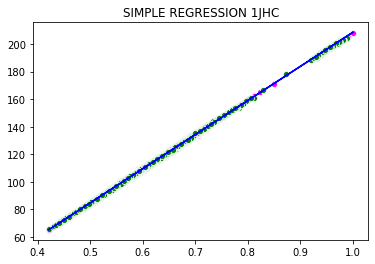

r-score =  0.9997357806324659
MSE:  0.08802649444810445
a:  [[247.67098822]]
intercept:  [-39.1093882]
**********************************************


In [144]:
reg_simple_plot(df10,'1JHC')

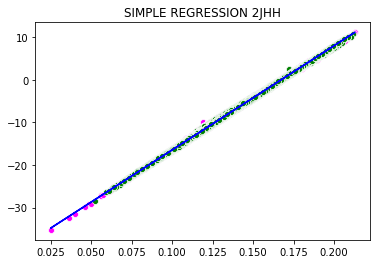

r-score =  0.9991704968303211
MSE:  0.013062987979132912
a:  [[245.21835074]]
intercept:  [-40.9862358]
**********************************************


In [145]:
reg_simple_plot(df10,'2JHH')

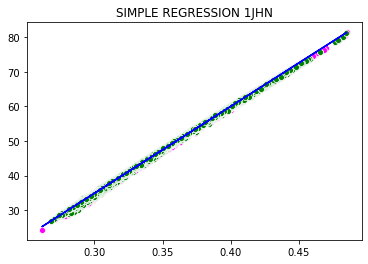

r-score =  0.9994836933067064
MSE:  0.060814132722302815
a:  [[250.92793978]]
intercept:  [-40.37537886]
**********************************************


In [146]:
reg_simple_plot(df10,'1JHN')

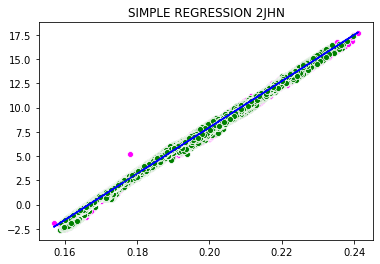

r-score =  0.9966886154777194
MSE:  0.044944051072934574
a:  [[239.02458018]]
intercept:  [-39.84029498]
**********************************************


In [147]:
reg_simple_plot(df10,'2JHN')

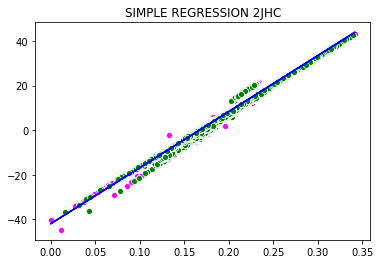

r-score =  0.9839398115455792
MSE:  0.3253124103179472
a:  [[251.85796076]]
intercept:  [-42.04089107]
**********************************************


In [148]:
reg_simple_plot(df10,'2JHC')

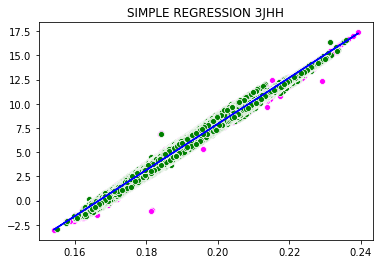

r-score =  0.9901298284373904
MSE:  0.13616759909696258
a:  [[238.26098861]]
intercept:  [-39.73179777]
**********************************************


In [149]:
reg_simple_plot(df10,'3JHH')

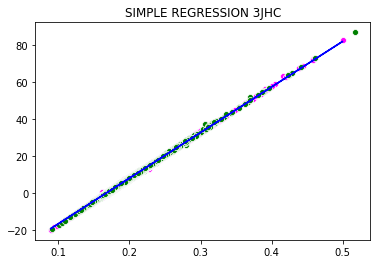

r-score =  0.9988670471177382
MSE:  0.010686630246001014
a:  [[246.4921425]]
intercept:  [-41.21313219]
**********************************************


In [150]:
reg_simple_plot(df10,'3JHC')

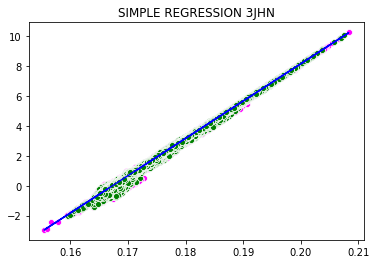

r-score =  0.9942103153007352
MSE:  0.010132365267198627
a:  [[249.31258952]]
intercept:  [-41.71634085]
**********************************************


In [151]:
reg_simple_plot(df10,'3JHN')